## Regresión Lineal 

Este ejercicio nos va a servir de ejemplo de como hacer una Regresión Lineal. Es decir, vamos a buscar los parámetros de la curva que relacionan las variables de entrada con la variable que queremos predecir. 

Cada uno de los datasets contiene la información de un año al respecto de un "Índice de felicidad". Este índice está basado en una encuesta y se relaciona con otros datos por países. Debemos conseguir calcular ese índice de felicidad (Score) usando el resto de los datos.

Sigue los pasos indicados con el profesor:

Lo primero que debes hacer es importar el csv en un DataFrame y lanzar la matriz de correlación. ¿Cual es el dato del que más depende la puntuación de la felicidad?

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

felicidad_2019 = pd.read_csv("2019.csv")
felicidad_2019.head()




,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [122]:
felicidad_2019.corr(numeric_only=True)['Score'].abs().sort_values(ascending=False)[2:]

GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

Ahora vamos a ver gráficamente la relación entre la felicidad y el producto interior bruto per cápita. Haz una gráfica (plt.scatter(x,y)) que tenga en el eje Y el PIB per capita y en el eje X la puntuación de la felicidad.

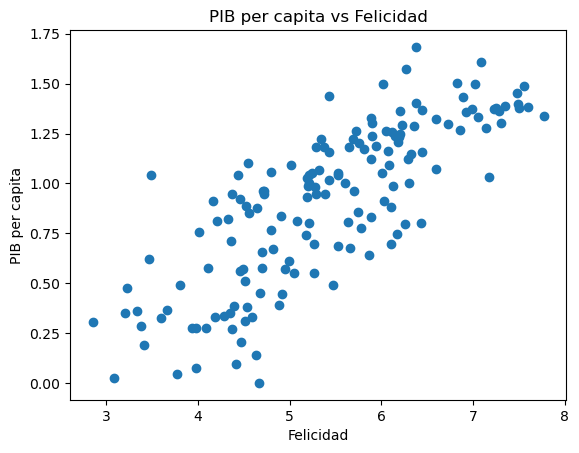

In [123]:
puntuacion_felicidad = felicidad_2019["Score"]
producto_interior = felicidad_2019["GDP per capita"]

plt.scatter(puntuacion_felicidad,producto_interior)
plt.title("PIB per capita vs Felicidad")
plt.xlabel("Felicidad")
plt.ylabel("PIB per capita")
plt.show()

Para ahondar más en el tema, mira a ver cuales son los 5 países con mejor puntuación en felicidad y los 5 con peor puntuación.

In [124]:
print(felicidad_2019.head()["Country or region"])
print(felicidad_2019.tail()["Country or region"])


0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
Name: Country or region, dtype: object
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, dtype: object


Vamos a coger los datos del resto de años. Importa los datos de 2015, 2016, 2017 y 2018. Debes borrar las columnas que no coincidan con las de 2019 y ordenarlas para que tengan el mismo orden. Finalmente, cambiamos los nombres de las columnas para que todas tengan las mismas y juntamos los datos con concat.

In [125]:
#Importamos
felicidad_2015 = pd.read_csv("2015.csv")
felicidad_2016 = pd.read_csv("2016.csv")
felicidad_2017 = pd.read_csv("2017.csv")
felicidad_2018 = pd.read_csv("2018.csv")

#Eliminamos columnas
felicidad_2015.drop(columns=['Standard Error','Region','Dystopia Residual'],inplace=True)
felicidad_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval','Region','Dystopia Residual'],inplace=True)
felicidad_2017.drop(columns=['Whisker.high', 'Whisker.low','Dystopia.Residual'],inplace=True)

#Ordenamos columnas
felicidad_2015 = felicidad_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)']]
felicidad_2016 = felicidad_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)']]
felicidad_2017 = felicidad_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom','Generosity', 'Trust..Government.Corruption.']]

nombres_columnas = ['Happiness Rank', 'Country', 'Score', 'GDP per capita', 'Social Support', 'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Generosity', 'Perceptions of Corruption']
anyos = [felicidad_2015, felicidad_2016, felicidad_2017, felicidad_2018, felicidad_2019]
for anyo in anyos:
    anyo.columns = nombres_columnas


felicidad = pd.concat(anyos)

felicidad.sort_values(by='Score',ascending=False).head(10)



,Happiness Rank,Country,Score,GDP per capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,1,Finland,7.769,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
0,1,Finland,7.632,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000
1,2,Denmark,7.600,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
1,2,Norway,7.594,1.456000,1.582000,0.861000,0.686000,0.286000,0.340000
0,1,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780
1,2,Iceland,7.561,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450
2,3,Denmark,7.555,1.351000,1.590000,0.868000,0.683000,0.284000,0.408000
2,3,Norway,7.554,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
2,3,Denmark,7.527,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570


Ahora vamos a escalar los valores mediante el StandardScaler de sklearn para que todos contribuyan igualmente al resultado y los coeficientes queden del mismo orden. Primero nos cargamos los valores no numéricos o los que no tienen relevancia.

In [126]:
from sklearn.model_selection import train_test_split
#X = felicidad.drop(['Score','Generosity','Perceptions of Corruption'],axis=1)
X = felicidad[['GDP per capita','Social Support','Healthy Life Expectancy','Generosity']]
#X = felicidad['GDP per capita'].to_frame()
y = felicidad['Score'].to_frame()


In [127]:
X

,GDP per capita,Social Support,Healthy Life Expectancy,Generosity
0,1.39651,1.34951,0.94143,0.29678
1,1.30232,1.40223,0.94784,0.43630
2,1.32548,1.36058,0.87464,0.34139
3,1.45900,1.33095,0.88521,0.34699
4,1.32629,1.32261,0.90563,0.45811
...,...,...,...,...
151,0.35900,0.71100,0.61400,0.21700
152,0.47600,0.88500,0.49900,0.27600
153,0.35000,0.51700,0.36100,0.15800
154,0.02600,0.00000,0.10500,0.23500


In [128]:
#diferencia minmaxscaler
from sklearn.preprocessing import StandardScaler
escalado = StandardScaler()
X = escalado.fit_transform(X)


Vamos ahora a quedarnos con las variables numéricas que tienen más correlación con el resultado buscado. Para eso borramos las columnas que no necesitamos. Guardaremos en X un DataFrame con las variables de entrada e y a la variable resultado (la puntuación de la felicidad).

Después vamos a generar el set de datos de entrenamiento y el de test. Para ello vamos a utilizar la función train_test_split de sklearn.

In [129]:
print(X.shape)
print(y.shape)

(782, 4)
(782, 1)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Ahora podemos entrenar el algoritmo:

In [131]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Hemos creado un objeto, lm, que tendrá los atributos y métodos que necesitamos para conseguir el resultado. En sus atributos estarán los coeficientes del resultado, por ejemplo, y tiene métodos para calcular con la función resultante predicciones con datos de entrada nuevos. Ahora vamos a ver que coeficiente (parámetros del modelo) tiene cada una de las columnas analizada. Para ello vamos a meter los coeficientes en un DataFrame.

In [132]:
coeficientes = lm.coef_
print(coeficientes)


[[0.52936337 0.24369724 0.27727735 0.15563995]]


In [133]:
lm.intercept_

array([5.38498963])

¿Hemos conseguido un resultado bueno? Para eso tenemos guardado el set de test (y_train). Vamos a calcular los valores que predice nuestro modelo para los datos de test y comprobar si se parecen a las resultados reales, es decir, a los índices de felicidad que tenía el dataset. Para ello calculamos el error cuadrático medio.

In [134]:
y_pred = lm.predict(X_test)

In [135]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Error cuadrático medio: ', MSE(y_test,y_pred))

Error cuadrático medio:  0.35251671498627835


Si no ponemos el parámetro squared=False nos devuelve el MSE (error cuadrático medio). De esta forma nos devuelve el RMSE (Raiz del error cuadrático medio). ¿Pero 0.56 es mucho o poco? ¿Tenemos mucho error?
Vamos a calcular otra métrica del error el R square.

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7401348183735257

El resultado no es muy bueno. El RMSE debe estar lo más cercano posible a 0. Sin embargo, el R square debe estar lo más cercano posible a 1.
Veamos los valores reales y los predichos pintados:

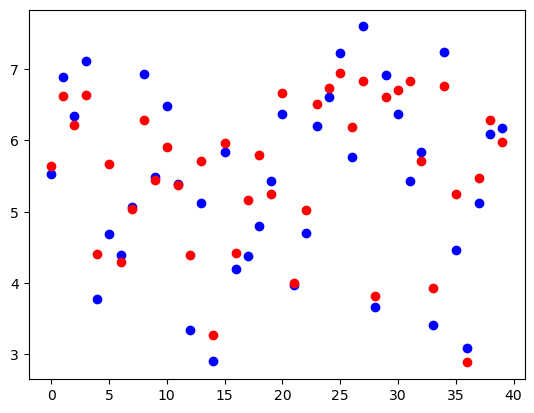

In [138]:
y_test_show = y_test[:40]
y_pred_show = y_pred[:40]
plt.scatter(range(len(y_test_show)), y_test_show, color='blue')
plt.scatter(range(len(y_pred_show)), y_pred_show, color='red')
plt.show()